# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [68]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

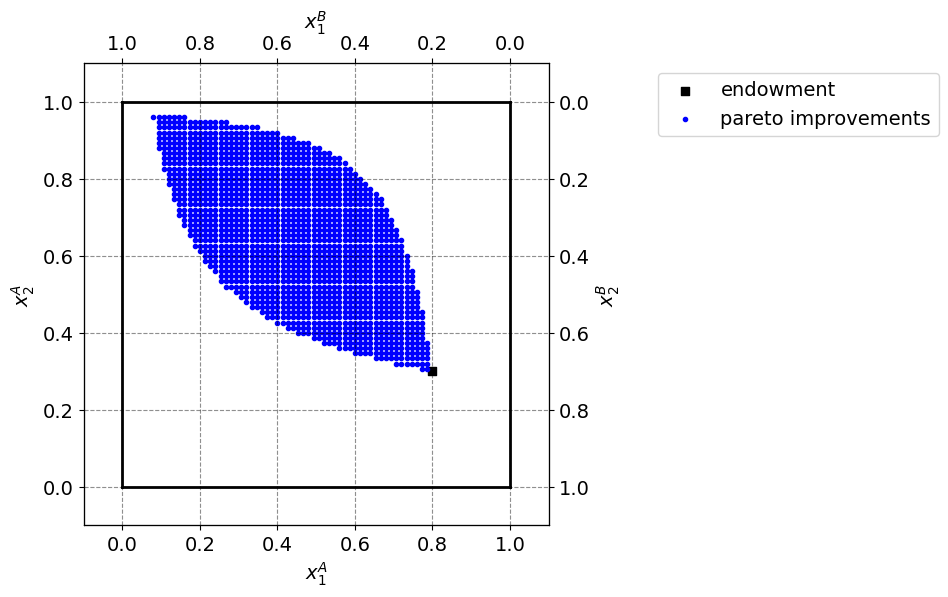

In [69]:
import matplotlib.pyplot as plt
from types import SimpleNamespace

class ExchangeEconomyClass:
    
    def __init__(self):

        self.par = SimpleNamespace()

        # a. preferences
        self.par.alpha = 1/3
        self.par.beta = 2/3

        # b. endowments
        self.par.w1A = 0.8
        self.par.w2A = 0.3

    def utility_A(self,x1A,x2A):
        return x1A**self.par.alpha * x2A**(1-self.par.alpha)

    def utility_B(self,x1B,x2B):
        return x1B**self.par.beta * x2B**(1-self.par.beta) 

    def demand_A(self,p1):
        x1A = self.par.alpha*(p1*self.par.w1A+self.par.w2A)/p1
        x2A = (1-self.par.alpha)*(p1*self.par.w1A+self.par.w2A)

        return x1A, x2A

    def demand_B(self,p1):
        x1B = self.par.beta*(p1*self.par.w1A+self.par.w2A)/p1
        x2B = (1-self.par.beta)*(p1*self.par.w1A+self.par.w2A)

        return x1B, x2B
    
    def check_market_clearing(self,p1):

        x1A, x2A = self.demand_A(p1)
        x1B, x2B = self.demand_B(p1)

        eps1 = x1A - self.par.w1A + x1B - (1 - self.par.w1A)
        eps2 = x2A - self.par.w2A + x2B - (1 - self.par.w2A)

        return eps1, eps2
    
    def question1(self):
        self.list_x1A = []
        self.list_x2A = []

        for j in range(76):  # Including 75
            x1A = j / 75
            for i in range(76):  # Including 75
                x2A = i / 75
                x1B = 1 - x1A
                x2B = 1 - x2A

                if self.utility_A(x1A, x2A) >= self.utility_A(self.par.w1A, self.par.w2A) and \
                   self.utility_B(x1B, x2B) >= self.utility_B(1 - self.par.w1A, 1 - self.par.w2A):
                    self.list_x1A.append(x1A)
                    self.list_x2A.append(x2A)

    def question2(self):
        self.price_list = []
        self.error1 = []
        self.error2 = []
        
        for var in range(76):
            price = 0.5 + 2 * (var / 75)
            eps1, eps2 = self.check_market_clearing(price)
            
            self.price_list.append(price)
            self.error1.append(eps1)
            self.error2.append(eps2)

model = ExchangeEconomyClass()
model.question1()

list_x1A = model.list_x1A
list_x2A = model.list_x2A

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(model.par.w1A, model.par.w2A, marker='s', color='black', label='endowment')
ax_A.scatter(list_x1A, list_x2A, marker='.', color='blue', label='pareto improvements')

# limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.86,1.0))

plt.show()

# Question 2

Explain your code and procedure

[0.5, 0.5266666666666666, 0.5533333333333333, 0.58, 0.6066666666666667, 0.6333333333333333, 0.66, 0.6866666666666666, 0.7133333333333334, 0.74, 0.7666666666666666, 0.7933333333333333, 0.8200000000000001, 0.8466666666666667, 0.8733333333333333, 0.9, 0.9266666666666667, 0.9533333333333334, 0.98, 1.0066666666666668, 1.0333333333333332, 1.06, 1.0866666666666667, 1.1133333333333333, 1.1400000000000001, 1.1666666666666665, 1.1933333333333334, 1.22, 1.2466666666666666, 1.2733333333333334, 1.3, 1.3266666666666667, 1.3533333333333335, 1.38, 1.4066666666666667, 1.4333333333333333, 1.46, 1.4866666666666668, 1.5133333333333334, 1.54, 1.5666666666666667, 1.5933333333333333, 1.62, 1.6466666666666667, 1.6733333333333333, 1.7, 1.7266666666666666, 1.7533333333333334, 1.78, 1.8066666666666666, 1.8333333333333333, 1.86, 1.8866666666666667, 1.9133333333333333, 1.94, 1.9666666666666666, 1.9933333333333334, 2.02, 2.046666666666667, 2.0733333333333333, 2.1, 2.126666666666667, 2.1533333333333333, 2.1799999999

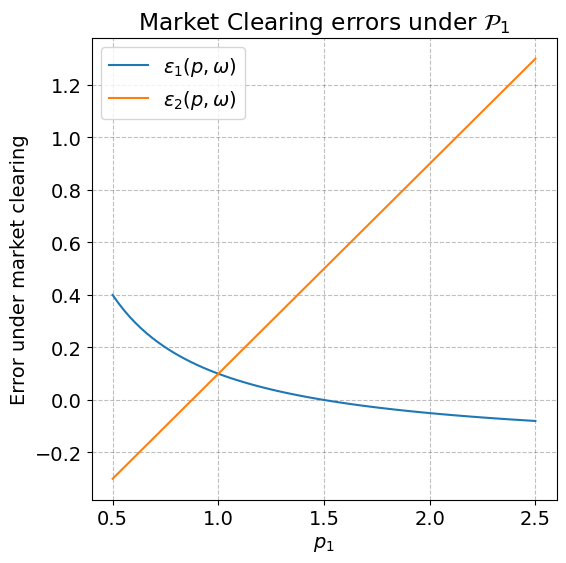

In [70]:
# Define p1 as an empty list 
p1 = []

# Use loop to make the p1 valueset
for i in range(N+1):
    p1.append(0.5 + 2*i/N)

# Ensure the values in the p1 list by printing 
print(p1) 

# Make error an empty list
error = []

# Calculate errors given by eps1 and eps2 by using the clearing condition which is given as: check_market_clearing from ExchangeEconomy.py 
for i in p1:
    error.append(model.check_market_clearing(i))

# See  the values of eps1 and eps2 from 1-10
print(error[0:10])

# Make the error list into two list calles error1 and error2 
error1,error2 = zip(*error)

# plot of errors 
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_C = fig.add_subplot(1, 1, 1)

ax_C.set_ylabel("Error under market clearing")
ax_C.set_xlabel("$p_1$")
ax_C.set_title("Market Clearing errors under $\mathcal{P}_1$")

ax_C.plot(p1, error1, label = '$\epsilon_1(p,\omega)$')
ax_C.plot(p1, error2, label = '$\epsilon_2(p,\omega)$')
ax_C.legend()

# Question 3

Explain your code and procedure

In [84]:
from scipy.optimize import minimize
from ExchangeEconomy import ExchangeEconomyClass  # Assuming ExchangeEconomyClass is properly defined in ExchangeEconomy module

# Instantiate ExchangeEconomyClass
model = ExchangeEconomyClass()

def error_combined(p1):
    x1A, x2A = model.demand_A(p1)
    x1B, x2B = model.demand_B(p1)
    
    eps1 = x1A - model.par.w1A + x1B - (1 - model.par.w1A)
    eps2 = x2A - model.par.w2A + x2B - (1 - model.par.w2A)
    
    return eps1 + eps2

# Define the bounds for p1
p1_bounds = (0.5, 2.5)

# Call solver
sol_clearing_price = minimize(error_combined, bounds=p1_bounds)

# Unpack solution
solution_price = sol_clearing_price.x
print(f"Market-clearing price p1: {solution_price}")

TypeError: minimize() missing 1 required positional argument: 'x0'

ADD CONCISE CONLUSION.